In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 

import uproot
import glob
import yaml

np.seterr(divide='ignore', invalid='ignore')

plt.style.use('physics.mplstyle')

In [2]:
def get_limits(fn):
    f = uproot.open(fn)
    limit = f["limit"].array("limit")
    quant = f["limit"].array("quantileExpected")
    if limit.shape[0] == 1:
        return -1
    else:
        return np.stack([quant,limit])
    
def get_2HDM_file(Mh=125, Ma=1000, path="./fitroom/Fixed_2HDM_Mar19/"):
    fname = os.path.join(
        path,
        "higgsCombinePseudoscalar2HDM_mH-{}_ma-{}.AsymptoticLimits.mH125.root".format(Mh, Ma)
    )
    if os.path.isfile(fname):
        return fname
    else:
        print("failed to file the file ... ")
        return None
    
def get_2HDM_xsec(mH=125, ma=1000):
    xsecs = {}
    with open("./config/xsections_2017.yaml", 'r') as stream:
        xsecs = yaml.safe_load(stream)
    d = xsecs["Pseudoscalar2HDM_MonoZLL_mScan_mH-{}_ma-{}".format(mH, ma)]
    return d.get("xsec",0) * d.get("br",0) * d.get("kr",0)

In [3]:
import re

mass_points = []
for p in glob.glob("./fitroom/higgsCombinePseudoscalar2HDM*"):
    mass_points.append([int(s) for s in re.findall(r'\d+',p)][1:3])

In [4]:
glob.glob("./fitroom/Fixed_2HDM_Mar19/higgsCombinePseudoscalar2HDM*")

['./fitroom/Fixed_2HDM_Mar19/higgsCombinePseudoscalar2HDM_mH-1000_ma-100.AsymptoticLimits.mH125.root',
 './fitroom/Fixed_2HDM_Mar19/higgsCombinePseudoscalar2HDM_mH-1000_ma-200.AsymptoticLimits.mH125.root',
 './fitroom/Fixed_2HDM_Mar19/higgsCombinePseudoscalar2HDM_mH-1000_ma-300.AsymptoticLimits.mH125.root',
 './fitroom/Fixed_2HDM_Mar19/higgsCombinePseudoscalar2HDM_mH-1000_ma-400.AsymptoticLimits.mH125.root',
 './fitroom/Fixed_2HDM_Mar19/higgsCombinePseudoscalar2HDM_mH-1000_ma-500.AsymptoticLimits.mH125.root',
 './fitroom/Fixed_2HDM_Mar19/higgsCombinePseudoscalar2HDM_mH-1200_ma-100.AsymptoticLimits.mH125.root',
 './fitroom/Fixed_2HDM_Mar19/higgsCombinePseudoscalar2HDM_mH-1200_ma-200.AsymptoticLimits.mH125.root',
 './fitroom/Fixed_2HDM_Mar19/higgsCombinePseudoscalar2HDM_mH-1200_ma-300.AsymptoticLimits.mH125.root',
 './fitroom/Fixed_2HDM_Mar19/higgsCombinePseudoscalar2HDM_mH-1200_ma-400.AsymptoticLimits.mH125.root',
 './fitroom/Fixed_2HDM_Mar19/higgsCombinePseudoscalar2HDM_mH-1200_ma-500.

In [5]:
f = get_2HDM_file("./fitroom/higgsCombinePseudoscalar2HDM_mH-1000_ma-100.AsymptoticLimits.mH125.root")

failed to file the file ... 


In [6]:
f

In [7]:
mass_points

[[1000, 100],
 [1000, 200],
 [1000, 300],
 [1000, 400],
 [1000, 500],
 [1200, 100],
 [1200, 200],
 [1200, 300],
 [1200, 400],
 [1200, 500],
 [1400, 100],
 [1400, 200],
 [1400, 300],
 [1400, 400],
 [1400, 500],
 [200, 100],
 [300, 100],
 [300, 200],
 [400, 100],
 [400, 200],
 [400, 300],
 [500, 100],
 [500, 200],
 [500, 300],
 [500, 400],
 [600, 100],
 [600, 200],
 [600, 300],
 [600, 400],
 [600, 500],
 [700, 100],
 [700, 200],
 [700, 300],
 [700, 400],
 [700, 500],
 [800, 100],
 [800, 200],
 [800, 300],
 [800, 400],
 [800, 500],
 [900, 100],
 [900, 200],
 [900, 300],
 [900, 400],
 [900, 500]]

(50, 600)

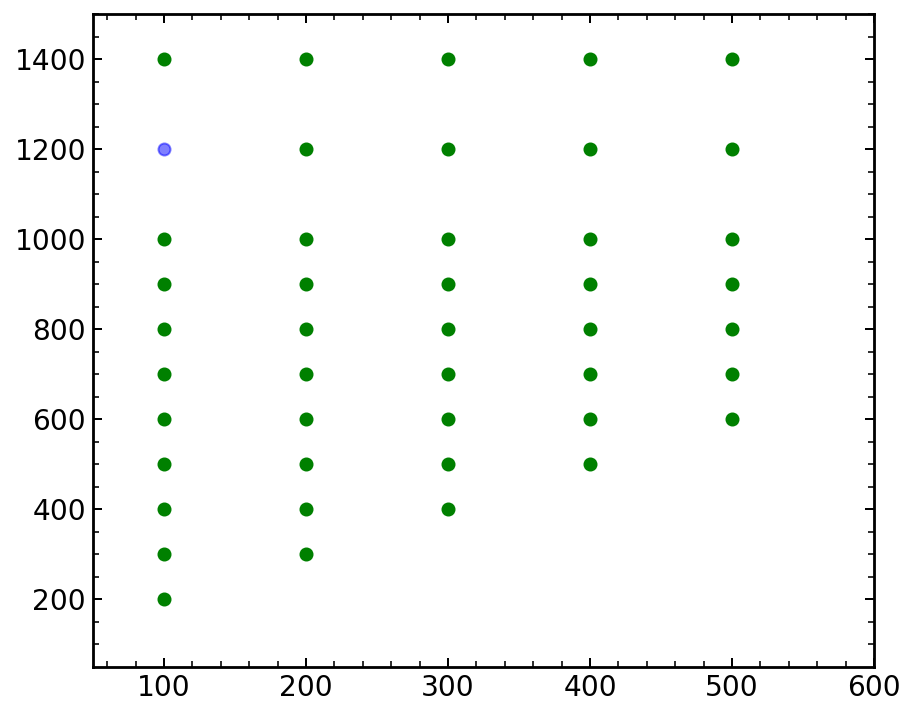

In [8]:
plt.figure(figsize=(7,6))

for pt in mass_points:
    #print(pt, limit)
    try:
        limit = get_limits(get_2HDM_file(*pt))
        if limit.shape == (2,6):
            plt.scatter(pt[1],pt[0], color="green")
        else:
            plt.scatter(pt[1],pt[0], color="blue", alpha=0.5)
    except:
        pass
        get_2HDM_file(*pt)
        plt.scatter(pt[1],pt[0], color="red")
        
        
plt.ylim([50, 1500])
plt.xlim([50, 600])

In [9]:
import scipy

def plot_2HDM(unblind=True):
    limit_mH = []
    limit_ma = []
    limit_lm = []
    limit_xs = []
    mZ = 91.1876
    return_limit = []
    for mp in mass_points:
        limit = get_limits(get_2HDM_file(*mp))
        if limit.shape == (2, 6):
            limit_lm.append(limit)
            limit_mH.append(mp[0])
            limit_ma.append(mp[1])
            return_limit.append([mp[0], mp[1], limit[1,2]])
            limit_xs.append(get_2HDM_xsec(mH=mp[0], ma=mp[1]))
            
    limit_lm = np.array(limit_lm)
    limit_mH = np.array(limit_mH)
    limit_ma = np.array(limit_ma)
    limit_xs = np.array(limit_xs)
    
    plt.figure(figsize=(6,6))
    ax = plt.gca()
    
    plt.tricontourf(limit_ma, limit_mH, limit_lm[:,1,2], levels=np.linspace(0,2,100), cmap="Wistia")
    #plt.colorbar()
    
    p1 = plt.tricontour(limit_ma, limit_mH, limit_lm[:,1,1], levels=[0,1], colors="k", alpha=0)
    p2 = plt.tricontour(limit_ma, limit_mH, limit_lm[:,1,2], levels=[0,1], colors="k", alpha=0)
    p3 = plt.tricontour(limit_ma, limit_mH, limit_lm[:,1,3], levels=[0,1], colors="k", alpha=0)
    
    p4 = plt.tricontour(limit_ma, limit_mH, limit_lm[:,1,5], levels=[0,1], colors="k", alpha=0)
    
    print(p4)
    line1 = np.array(p1.collections[1].get_paths()[0].vertices)
    line2 = np.array(p2.collections[1].get_paths()[0].vertices)
    line3 = np.array(p3.collections[1].get_paths()[0].vertices)
    line4 = np.array(p4.collections[1].get_paths()[0].vertices)
    print(line4)
    
#     smooth_line = interpolate.Rbf(line[:,1], line[:,0], function="thin_plate")
    
    mH = np.linspace(200, 1400, 100)
    plt.plot(line1[:,0], line1[:,1], "r--", label="$\pm 1\sigma$ band")
    plt.plot(line2[:,0], line2[:,1], "b-", label="Expected $95\%$ CL")
    plt.plot(line3[:,0], line3[:,1], "r--")
    plt.plot(line4[:,0], line4[:,1], "k-", label="Observed $95\%$ CL")
    #plt.fill_between(line1[:,0], line1[:,1], line3[:,0], line3[:,1])
    #plt.plot(smooth_line(mH), mH, "k-")
    
    plt.plot(mH - 91.1876,  mH, "k--", alpha=0.8)
    #plt.plot(mH,  mH, "k--", alpha=0.8)
    plt.xlabel("$m_{a}$ (GeV)")
    plt.ylabel("$m_{H}$ (GeV)")
    
    plt.xlim([100, 600])
    plt.ylim([100, 1600])
    
    plt.legend(loc="upper right", fontsize=12)
    plt.tight_layout()
    plt.savefig("without_interpolation.pdf")
    return return_limit

[[ 100.         1180.54555553]
 [ 180.86382636 1238.27234728]
 [ 200.         1234.57906007]
 [ 289.89461698 1220.21076604]
 [ 300.         1217.79114074]
 [ 339.32438669 1200.        ]
 [ 400.         1124.27246123]
 [ 433.35290835 1066.70581671]
 [ 444.4490225  1000.        ]
 [ 425.91072701  974.08927299]
 [ 427.19642794  900.        ]
 [ 411.78274502  811.78274502]
 [ 402.46259964  800.        ]
 [ 400.49079913  799.50920087]
 [ 400.          794.07160806]
 [ 326.34468614  700.        ]
 [ 309.62828646  690.37171354]
 [ 300.          613.92421154]
 [ 289.06704224  600.        ]
 [ 257.53821173  542.46178827]
 [ 246.30311883  500.        ]
 [ 254.82911764  454.82911764]
 [ 201.7165497   400.        ]
 [ 200.          386.39243861]
 [ 116.51949777  383.48050223]
 [ 117.19898551  300.        ]
 [ 100.          269.38978271]]


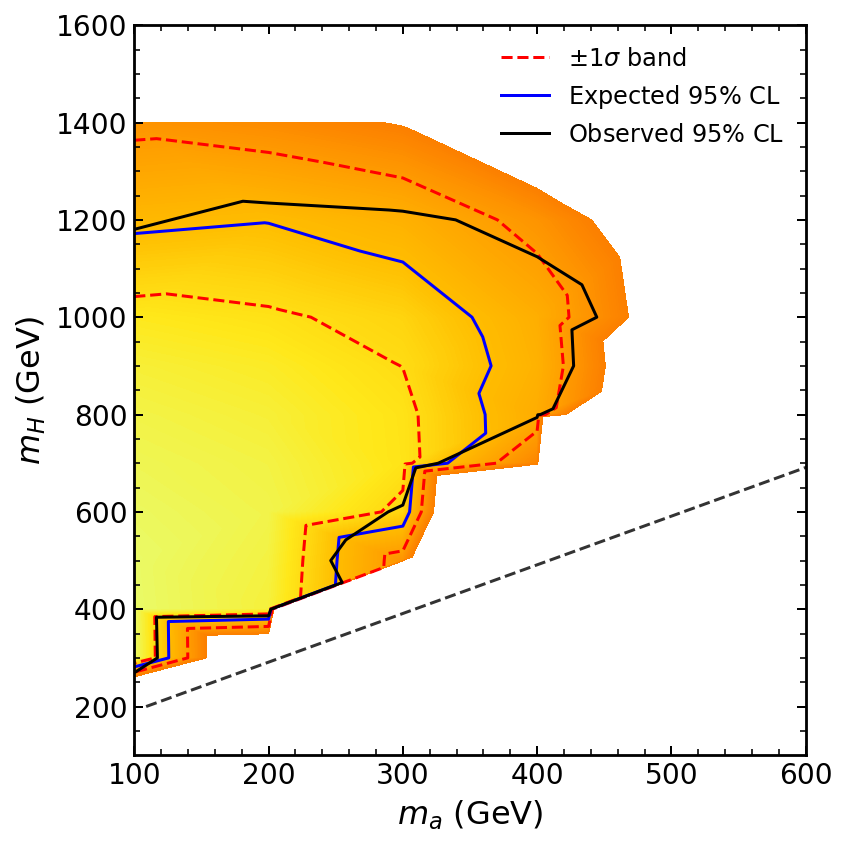

In [10]:
limit_result = plot_2HDM()

In [11]:
from matplotlib.legend_handler import HandlerLineCollection
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D


class HandlerDashedLines(HandlerLineCollection):
    """
    Custom Handler for LineCollection instances.
    """
    def create_artists(self, legend, orig_handle,
                   xdescent, ydescent, width, height, fontsize, trans):
        # figure out how many lines there are
        numlines = len(orig_handle.get_segments())
        xdata, xdata_marker = self.get_xdata(legend, xdescent, ydescent,
                                             width, height, fontsize)
        leglines = []
        # divide the vertical space where the lines will go

        ydata = (height/2.7) * np.ones(len(xdata), float)
        for i in range(numlines):
            legline = Line2D(xdata, ydata * (numlines - 2*i) - ydescent)
            self.update_prop(legline, orig_handle, legend)
            try:
                color = orig_handle.get_colors()[i]
            except IndexError:
                color = orig_handle.get_colors()[0]
            try:
                dashes = orig_handle.get_dashes()[i]
                #print ('dashes : ', dir(orig_handle))
            except IndexError:
                dashes = orig_handle.get_dashes()[0]
                #print ('dashes -> ', 0)
            try:
                lw = orig_handle.get_linewidths()[i]
            except IndexError:
                lw = orig_handle.get_linewidths()[0]
            if dashes[0] != None:
                legline.set_dashes(dashes[1])
            else:
                legline.set_linestyle('-')
            legline.set_color(color)
            legline.set_transform(trans)
            legline.set_linewidth(lw)
            leglines.append(legline)
        return leglines

In [12]:
def label_line(line, label, x, y, color='0.5', size=12):
    """Add a label to a line, at the proper angle.

    Arguments
    ---------
    line : matplotlib.lines.Line2D object,
    label : str
    x : float
        x-position to place center of text (in data coordinated
    y : float
        y-position to place center of text (in data coordinates)
    color : str
    size : float
    """
    xdata, ydata = line.get_data()
    x1 = xdata[0]
    x2 = xdata[-1]
    y1 = ydata[0]
    y2 = ydata[-1]

    ax = line.axes
    text = ax.annotate(label, xy=(x, y), xytext=(-10, 0),
                       textcoords='offset points',
                       size=size, color=color,
                       horizontalalignment='left',
                       verticalalignment='bottom')

    sp1 = ax.transData.transform_point((x1, y1))
    sp2 = ax.transData.transform_point((x2, y2))

    rise = (sp2[1] - sp1[1])
    run = (sp2[0] - sp1[0])

    slope_degrees = np.degrees(np.arctan2(rise, run))
    text.set_rotation(slope_degrees)
    return text

In [18]:
from scipy.ndimage import gaussian_filter1d

def interpLimit(limit, sigma=3):
    x, y = limit.T
    t  = np.linspace(0, 1, len(x))
    t2 = np.linspace(-0.9, 1.2, 100)

    x2 = np.interp(t2, t, x)
    y2 = np.interp(t2, t, y)
    
    x3 = gaussian_filter1d(x2, sigma)
    y3 = gaussian_filter1d(y2, sigma)
    x4 = np.interp(t, t2, x3)
    y4 = np.interp(t, t2, y3)

    return x3, y3

def interpolate2DLimit(unblind=False, smoothing=True, sigma=2, draw_mass_points=True, preliminary=False):
    limit_mH = []
    limit_ma = []
    limit_lm = []
    limit_xs = []
    mZ = 91.1876
    
    for mp in mass_points:
        limit = get_limits(get_2HDM_file(*mp))
        if limit.shape == (2, 6):
            limit_lm.append(limit)
            limit_mH.append(mp[0])
            limit_ma.append(mp[1])
            limit_xs.append(get_2HDM_xsec(mH=mp[0], ma=mp[1]))
            
    limit_lm = np.array(limit_lm)
    limit_mH = np.array(limit_mH)
    limit_ma = np.array(limit_ma)
    limit_xs = np.array(limit_xs)
    
    plt.figure(figsize=(6,6))
    ax = plt.gca()
        
    p1 = plt.tricontour(limit_ma, limit_mH, limit_lm[:,1,1], levels=[0,1], colors="k", alpha=0)
    p2 = plt.tricontour(limit_ma, limit_mH, limit_lm[:,1,2], levels=[0,1], colors="k", alpha=0)
    p3 = plt.tricontour(limit_ma, limit_mH, limit_lm[:,1,3], levels=[0,1], colors="k", alpha=0)
    p4 = plt.tricontour(limit_ma, limit_mH, limit_lm[:,1,5], levels=[0,1], colors="k", alpha=0)
    
    line1 = np.array(p1.collections[1].get_paths()[0].vertices)
    line2 = np.array(p2.collections[1].get_paths()[0].vertices)
    line3 = np.array(p3.collections[1].get_paths()[0].vertices)
    line4 = np.array(p4.collections[1].get_paths()[0].vertices)
    
    
    if smoothing:
        patch_exp = plt.plot(*interpLimit(line2, sigma), "b-")#, label="Expected $95\%$ CL")
        plt.plot(*interpLimit(line1, sigma), "r--")#, label="$\pm 1\sigma$ band")
        plt.plot(*interpLimit(line3, sigma), "r--")
        patch_obs = plt.plot(*interpLimit(line4, sigma), "k-", label="Observed $95\%$ CL")
    else:
        patch_exp = plt.plot(line1[:,0], line1[:,1], "r--", label="$\pm 1\sigma$ band")
        plt.plot(line2[:,0], line2[:,1], "b-" )#, label="Expected $95\%$ CL")
        plt.plot(line3[:,0], line3[:,1], "r--")
        patch_obs = plt.plot(line4[:,0], line3[:,1], "k-", label="Observed $95\%$ CL")
        
    if draw_mass_points: 
        plt.scatter(limit_ma, limit_mH, 
                    c=limit_lm[:,1,1], 
                    vmin=0, vmax=2,
                    cmap="rainbow", label="Mass points")
    
    
    plt.xlabel(r"${m}_{\rm a}$ [GeV]", x=1, ha='right')
    plt.ylabel(r"${m}_{\rm H}={m}_{\rm A}$ [GeV]", y=1, ha='right')
    
    plt.legend(loc="upper left", fontsize=14)
#     cms = plt.text(
#         0., 1., u"CMS $\it{Preliminary}$" if preliminary else u"CMS",
#         fontsize=16, fontweight='bold',
#         horizontalalignment='left', 
#         verticalalignment='bottom', 
#         transform=ax.transAxes
#     )
    cms = plt.text(
        0.05, 0.9, u"CMS $\it{Preliminary}$" if preliminary else u"CMS",
        fontsize=18, fontweight='bold',
        horizontalalignment='left', 
        verticalalignment='bottom', 
        transform=ax.transAxes
    )
    lumi = plt.text(
        1., 1., r"%1.0f fb$^{-1}$ (13 TeV)" % 137,
        fontsize=14, horizontalalignment='right', 
        verticalalignment='bottom', 
        transform=ax.transAxes
    )
    lumi = plt.text(
        0.45, 0.15, r"2HDM + a",
        fontweight='bold',
        fontsize=13, horizontalalignment='left', 
        verticalalignment='bottom', 
        transform=ax.transAxes
    )
    lumi = plt.text(
        0.45, 0.08, r"$\tan(\beta) = 1, \sin(\theta)=0.35$",
        fontsize=13, horizontalalignment='left', 
        verticalalignment='bottom', 
        transform=ax.transAxes
    )
    lumi = plt.text(
        0.45, 0.02, r"${m}_{\rm DM}=10~$GeV",
        fontsize=13, horizontalalignment='left', 
        verticalalignment='bottom', 
        transform=ax.transAxes
    )
    if draw_mass_points:
        plt.ylim([100, 1700])
    else:
        plt.ylim([100, 1600])
    plt.xlim([100, 600])
        
    ma = np.linspace(100, 600, 100)
    line = plt.plot(ma,  ma + 91.1876, "--", color="#57606f")
    label_line(line[0], r"${m}_{\rm H} = {m}_{\rm Z} + {m}_{\rm \sf{a}}$", 450, 550, color="#57606f", size=14)
    
    
    lc = LineCollection([np.column_stack([[0],[0]]) for i in np.arange(-1,2,1)],
                        linestyles = ['--', '-', '--'], colors = ['r', 'b', 'r'])
    
    plt.legend(
        [lc, patch_obs[0]], [r"Expected $95\%$ CL $\pm\sigma_{\rm experiment}$", "Observed $95\%$ CL"], 
        handler_map = {type(lc) : HandlerDashedLines()}, 
        handlelength = 2.5, fontsize=12
    )
    
    #plt.legend(loc="upper right", fontsize=12, ncol= 2 if draw_mass_points else 1)
#     plt.grid(b=True, which='major', color='grey', linestyle='--', alpha=0.3)

    plt.savefig("2HDM-limit-full-run2{}-big-CMS.pdf".format("-preliminary" if preliminary else ""), bbox_inches='tight')
    return line1, line2, line3

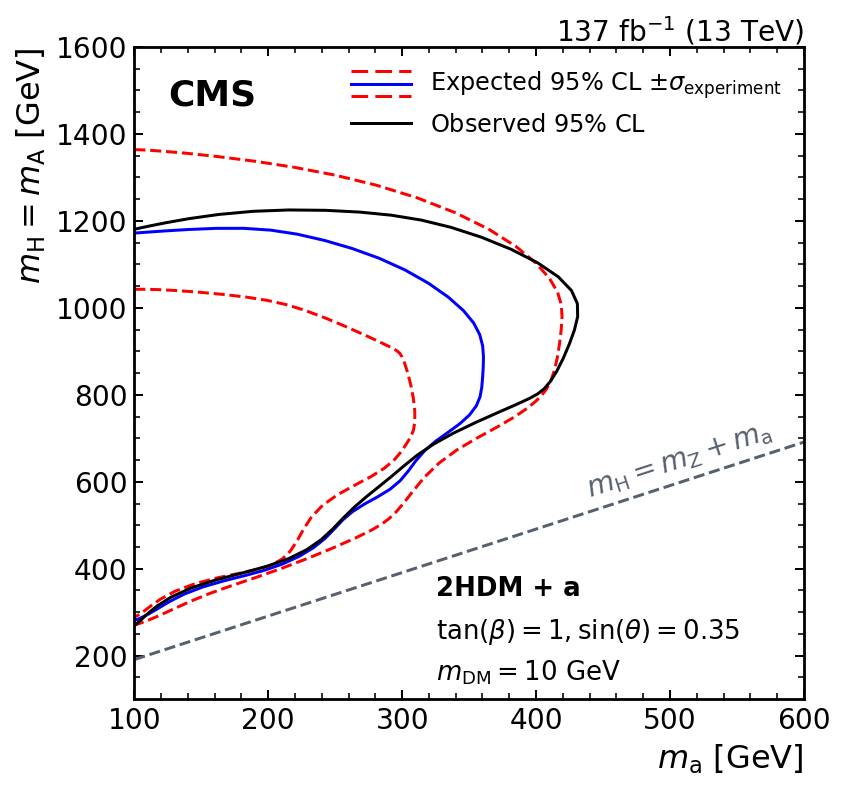

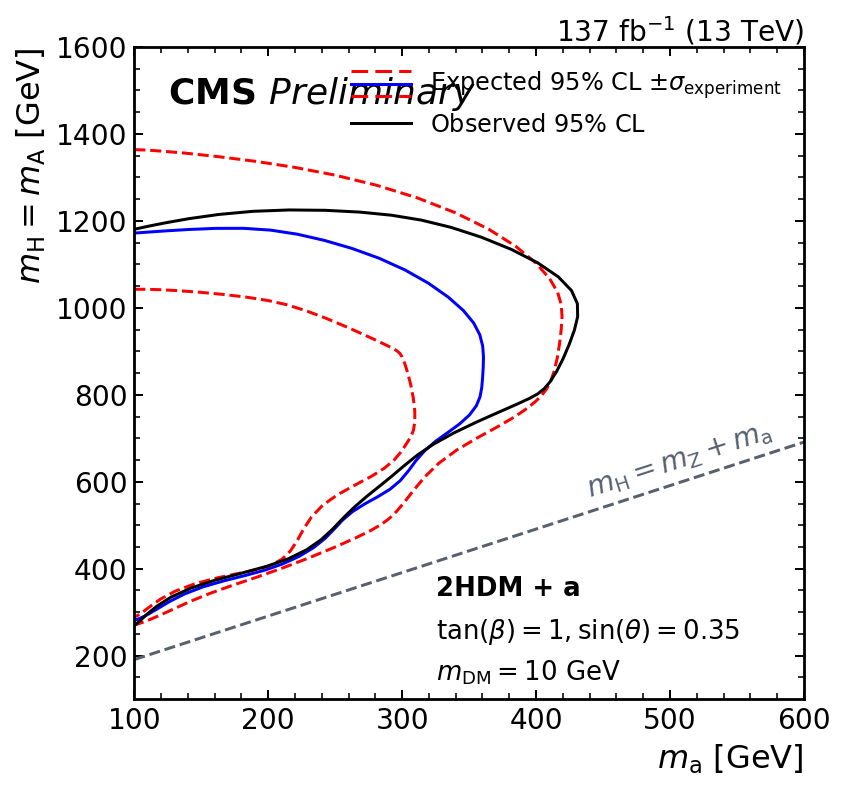

In [19]:
gr_limit = interpolate2DLimit(draw_mass_points=False)
gr_limit = interpolate2DLimit(draw_mass_points=False, preliminary=True)